# L17: Linear regression
Key concepts: Linear regression, nonlinear least-squares, heteroskedasticity

Application: Allometric scaling

In [1]:
# plot settings
options(repr.plot.width=6, repr.plot.height=5)


## Ordinary linear regression examples
Let's study the linear model $y = \beta_0 + \beta_1 x + \epsilon.$

In [2]:
# Simulate some linear data with noise
N <- 1000
beta0 <- 10.5
beta1 <- 2.6
sigma <- 14

X_ThePredictor <- seq(0,10,length=N)
eps <- rnorm(N,0,sigma) # noise aka residuals

Y_TheResponse <- beta0 + beta1*X_ThePredictor +eps

plot(X_ThePredictor,Y_TheResponse)

In [3]:
# Fit a linear model
lm(Y_TheResponse~X_ThePredictor)


Call:
lm(formula = Y_TheResponse ~ X_ThePredictor)

Coefficients:
   (Intercept)  X_ThePredictor  
         9.309           2.775  


---
Let's study the linear model $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \epsilon.$

In [4]:
# Multiple regression linear model

# Simulate some linear data with noise
N <- 1000000
beta0 <- 10.5
beta1 <- 2.6
beta2 <- 20
sigma <- 110

X1_ThePredictor <- runif(N,0,10)
X2_ThePredictor <- runif(N,0,10)
eps <- rnorm(N,0,sigma)

Y_TheResponse <- beta0 + beta1*X1_ThePredictor + beta2*X2_ThePredictor +eps

# Fit the model
lm(Y_TheResponse~X1_ThePredictor+X2_ThePredictor)


Call:
lm(formula = Y_TheResponse ~ X1_ThePredictor + X2_ThePredictor)

Coefficients:
    (Intercept)  X1_ThePredictor  X2_ThePredictor  
         10.483            2.637           19.959  


## Power law data

Now let us study the nonlinear model
$$ y =  y_0 \left( x \right)^\alpha + \epsilon$$
where we identify $y$ as the volume of mitochondia in a cell and $x$ as the volume of the cell. The parameter $\alpha$ is the power law determining how mitochondial size is controlled.

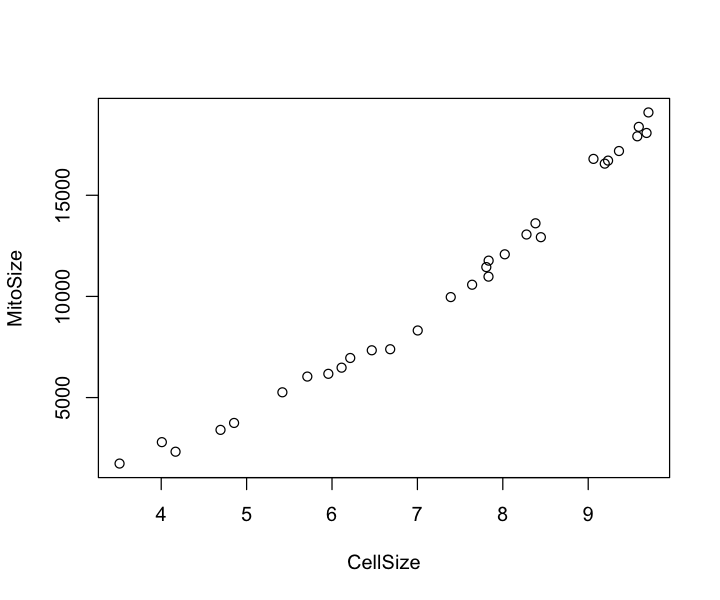

In [5]:
# Simulate power-law data

N <- 30
alpha <- 2.3
Y0 <- 100
sigma <- 500

CellSize <- runif(N,3,10) # independent variable
eps <- rnorm(N,0,sigma) # residuals

MitoSize <- Y0*CellSize^alpha + eps

plot(CellSize,MitoSize)

b         a 
99.285157  2.305458

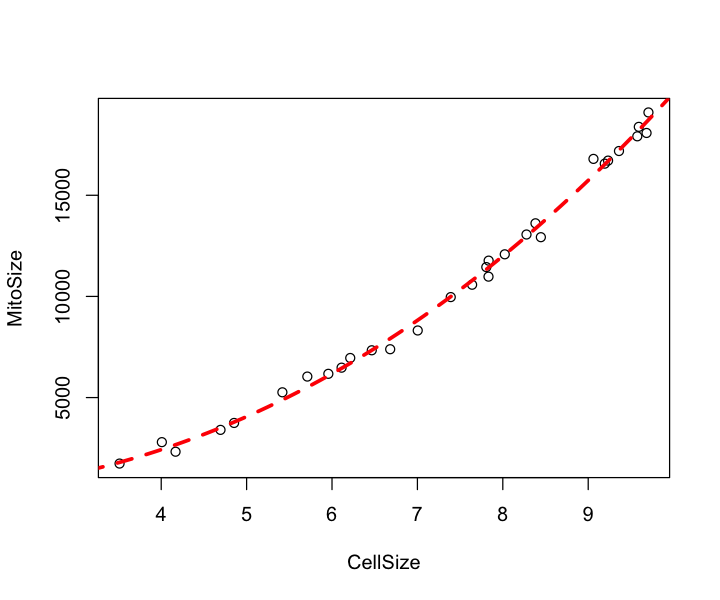

In [6]:
# nonlinear least squares
modelMitoSize <- nls(MitoSize~b*CellSize^a, start=list(b=1,a=5))

coef(modelMitoSize) # show coefficients

plot(CellSize,MitoSize)

# plot model prediction
cellSizeAxis <- seq(0,10,length=100)
b <- coef(modelMitoSize)[1]
a <- coef(modelMitoSize)[2]
mitoSizePrediction <- b*cellSizeAxis^a

lines(cellSizeAxis,mitoSizePrediction,col="red",lty=2,lwd=3)


---
Now we will transform the model into a linear model. Notice the assumption of noise makes the fit model
$$\mbox{log}y = \mbox{log}y_0 + \alpha \mbox{log}(x) + \epsilon$$
is __not__ the same as the "true" model used to generate the simulated data,
$$\mbox{log}y = \mbox{log}\left( y_0 \left( x \right)^\alpha + \epsilon\right).$$



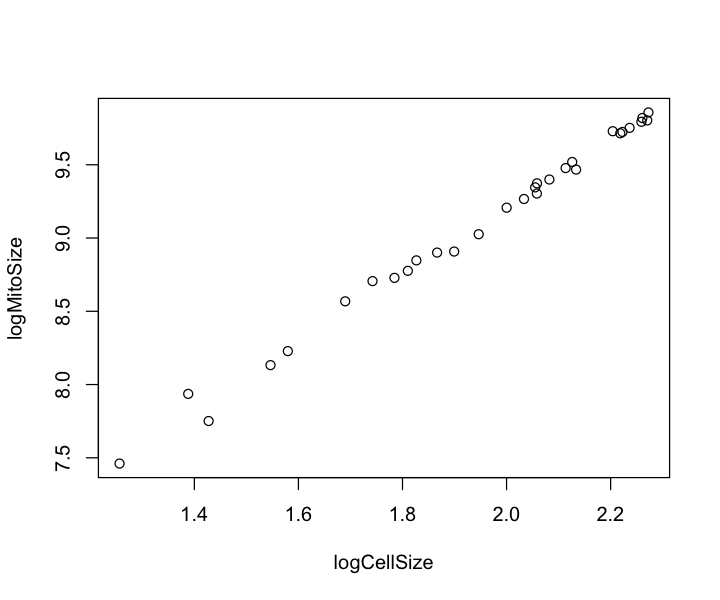

In [7]:
# Transform the data and then use linear regression

logMitoSize <- log(MitoSize)
logCellSize <- log(CellSize)

plot(logCellSize,logMitoSize)



Call:
lm(formula = logMitoSize ~ logCellSize)

Coefficients:
(Intercept)  logCellSize  
      4.603        2.303  


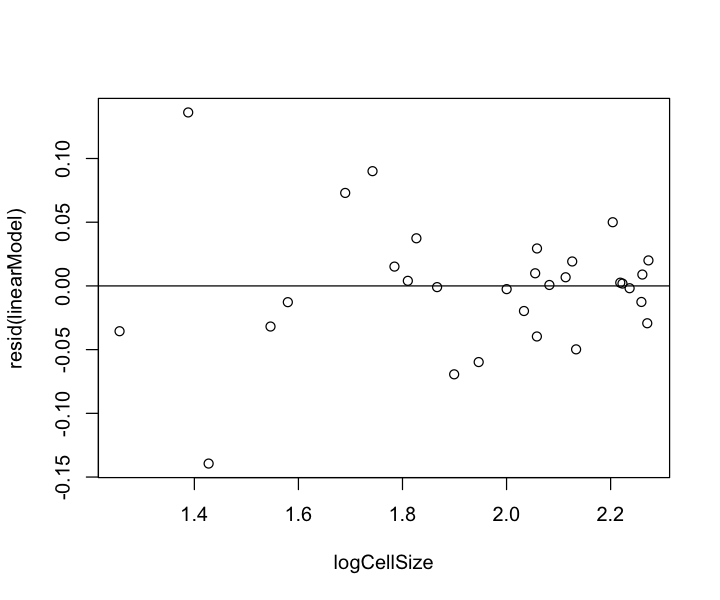

In [8]:

linearModel = lm(logMitoSize~logCellSize)

linearModel

# plot residuals
plot(logCellSize,resid(linearModel))
abline(0,0)
